In [4]:
#Fish prediction

#SAS practice datasets

#Multiple linear regression
#Multivariate analysis

This dataset is a record of 7 common different fish species in fish market sales. With this dataset, a predictive model can be performed using machine friendly data and estimate the weight of fish can be predicted.

In [5]:
#Importing all the needed libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as plt

#avaoiding warnings
import warnings
warnings.filterwarnings("ignore")

In [6]:
#Reading the file
fish= pd.read_csv("Fishmarket.csv")

In [7]:
#Display the the tables
fish.head(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [8]:
fish.shape

(159, 7)

In [9]:
fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [10]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [11]:
#Checking for null values
fish.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [12]:
#copy of fish file
df= fish.copy()

In [13]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [14]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

#Species = Species name of fish
#Weight = Weight of fish in Gram g
#Length1 = Vertical length in cm
#Length3 = Cross length in cm
#Height = Height in cm
#Width = Diagonal width in cm

In [15]:
#Checking for duplicate values

df[df.duplicated()== True]

,Species,Weight,Length1,Length2,Length3,Height,Width


In [16]:
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


In [17]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

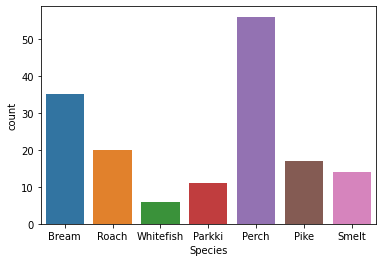

In [18]:

sns.countplot(df['Species'])



In [19]:
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

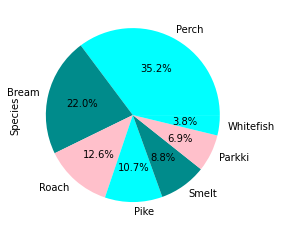

In [20]:
#PIE CHART

# Plotly Libraris
import plotly.express as px
import plotly.graph_objects as go

df['Species'].value_counts().plot.pie(autopct='%1.1f%%', colors = ['cyan','darkcyan','pink'])

Distribution of weight , height, and width

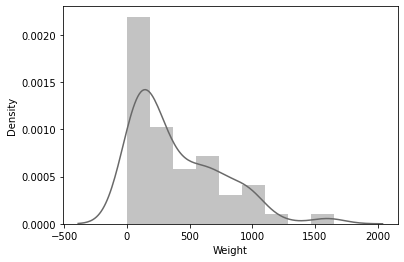

In [21]:
#Weight
sns.distplot(df['Weight'], color="DimGrey")


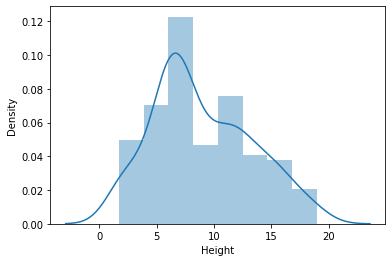

In [22]:
#Height
sns.distplot(df['Height'])

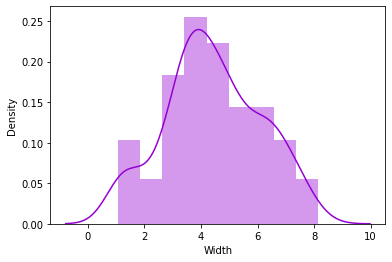

In [23]:
#Width
sns.distplot(df['Width'], color="darkviolet")

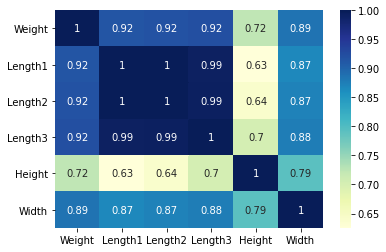

In [24]:
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu');

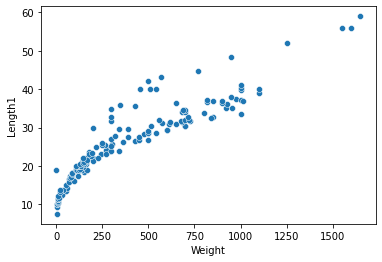

In [25]:
#scatterplot

sns.scatterplot(data=df, x="Weight", y="Length1")

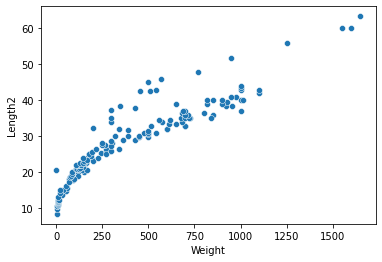

In [26]:
sns.scatterplot(data=df, x="Weight", y="Length2")

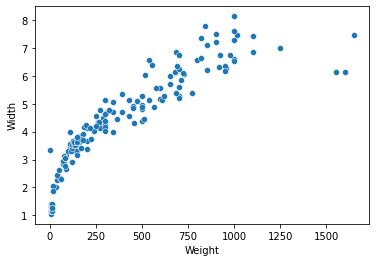

In [27]:
sns.scatterplot(data=df, x="Weight", y="Width")

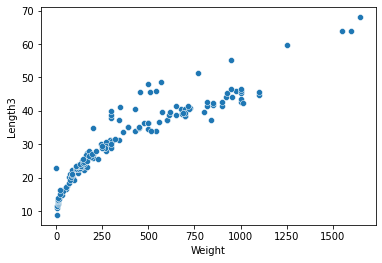

In [28]:
sns.scatterplot(data=df, x="Weight", y="Length3", palette="deep")

In [29]:
#So from the scatterplot it is evident that there are outliers

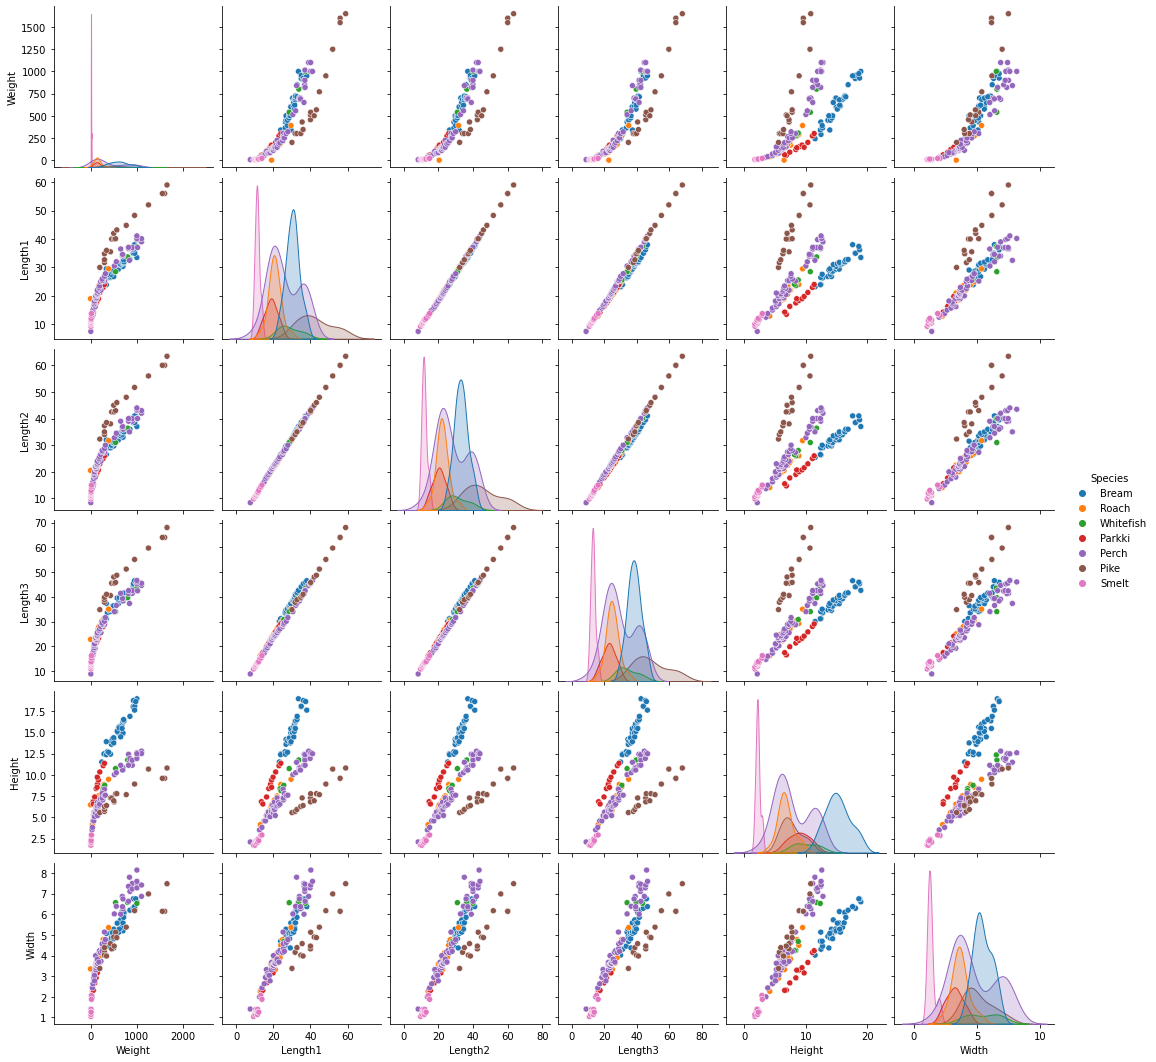

In [30]:
sns.pairplot(df, kind='scatter', hue='Species');

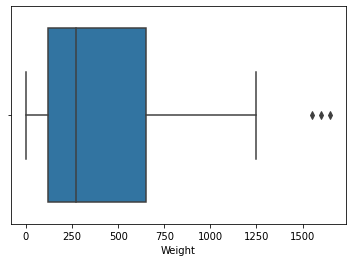

In [31]:
sns.boxplot(df['Weight'])


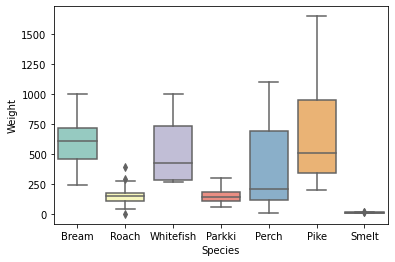

In [32]:
ax = sns.boxplot(x="Species", y="Weight", data=df, palette="Set3")

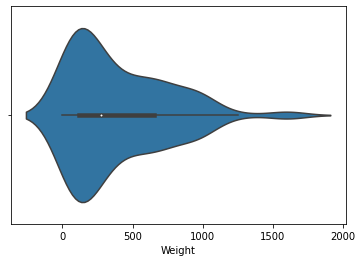

In [33]:
sns.violinplot(x=df["Weight"])

Data Preprocessing

In [34]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [35]:
#Create a duplicate dataframe
df1 = df.copy()

In [36]:
df1.head(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [37]:
df1.drop(['Species'], axis=1,inplace= True)

Local Outlier Factor

In [38]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

In [39]:
y_pred = clf.fit_predict(df1)
y_pred


array([ 1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1])

In [40]:
X_scores = clf.negative_outlier_factor_

In [41]:
X_scores[0:10]

array([-1.04832716, -0.99467313, -1.0990037 , -1.20001084, -1.12203907,
       -1.08435597, -1.01925887, -1.32019576, -1.08428857, -1.01918105])

In [42]:
np.sort(X_scores)[0:20]

array([-3.5663789 , -3.34913279, -3.13327277, -1.90682414, -1.32426711,
       -1.32019576, -1.31951325, -1.31046972, -1.30437778, -1.26540731,
       -1.25769858, -1.25754451, -1.25742347, -1.2073562 , -1.20489736,
       -1.20001084, -1.19702489, -1.17923169, -1.16742038, -1.16415862])

In [43]:
threshold_value = np.sort(X_scores)[4]
threshold_value

-1.3242671052456159

In [44]:
Outlier_df= df[X_scores < threshold_value]
indexs=Outlier_df.index
Outlier_df

,Species,Weight,Length1,Length2,Length3,Height,Width
141,Pike,1250.0,52.0,56.0,59.7,10.6863,6.9849
142,Pike,1600.0,56.0,60.0,64.0,9.6000,6.1440
143,Pike,1550.0,56.0,60.0,64.0,9.6000,6.1440
144,Pike,1650.0,59.0,63.4,68.0,10.8120,7.4800


In [45]:
# Kick Outliers
for i in indexs:
    df.drop(i, axis = 0,inplace = True)

In [46]:
df1.head(5)

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [47]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [48]:
#Now we are doing label encoder to the species column

In [49]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

In [50]:
lbe.fit_transform(df["Species"])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5])

In [51]:
df["Target"]=lbe.fit_transform(df["Species"])
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Target
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,0
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,0
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,0
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,0
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,0


In [52]:
df.drop(['Species'],axis=1,inplace=True)

In [53]:
df.head(5)

,Weight,Length1,Length2,Length3,Height,Width,Target
0,242.0,23.2,25.4,30.0,11.5200,4.0200,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,0


In [54]:
y=df['Target']
X=df.drop('Target',axis=1)

In [55]:
X.head(5)

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [56]:
#Now we normalize X


X = (X - np.min(X)) / (np.max(X) - np.min(X)).values
X.head()

,Weight,Length1,Length2,Length3,Height,Width
0,0.220000,0.384804,0.392610,0.457883,0.568334,0.418978
1,0.263636,0.404412,0.413395,0.483801,0.624055,0.459235
2,0.309091,0.401961,0.418014,0.481641,0.618123,0.514279
3,0.330000,0.460784,0.475751,0.533477,0.638566,0.480365
4,0.390909,0.465686,0.475751,0.544276,0.621966,0.576004


In [57]:
#splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,  test_size=0.2, random_state=42)

In [58]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (124, 6)
X_test (31, 6)
y_train (124,)
y_test (31,)


Modelling

In [59]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import train_test_split

In [60]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [61]:
#Decision treee

In [62]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state= 124)

In [63]:
print(X_train.shape, X_test.shape)

(108, 6) (47, 6)


In [67]:
model1= DecisionTreeClassifier()

In [68]:
model1.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [69]:
prediction = model1.predict(X_test)

accuracy_score(y_test, prediction)

NameError: ignored

In [70]:
from sklearn.metrics import classification_report, confusion_matrix

In [71]:
print (confusion_matrix(y_test, prediction))

[[12  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0]
 [ 0  0 12  0  3  0  0]
 [ 0  0  2  6  0  0  0]
 [ 0  0  3  0  0  0  0]
 [ 0  0  0  0  0  6  0]
 [ 0  0  1  0  0  0  0]]


In [72]:
print (classification_report (y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         2
           2       0.67      0.80      0.73        15
           3       1.00      0.75      0.86         8
           4       0.00      0.00      0.00         3
           5       1.00      1.00      1.00         6
           6       0.00      0.00      0.00         1

    accuracy                           0.81        47
   macro avg       0.67      0.65      0.65        47
weighted avg       0.81      0.81      0.80        47



In [73]:
#logistic regression

In [74]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
y_pred_loj = loj_model.predict(X_test)

In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [77]:
accuracy_score(y_test, y_pred_loj)

0.5957446808510638

In [78]:
print("Training Accuracy :", loj_model.score(X_train, y_train))
print("Testing Accuracy :", loj_model.score(X_test, y_test))

Training Accuracy : 0.6018518518518519
Testing Accuracy : 0.5957446808510638


In [79]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.645

In [80]:
print(classification_report(y_test, y_pred_loj))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.00      0.00      0.00         2
           2       0.44      1.00      0.61        15
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         3
           5       1.00      0.17      0.29         6
           6       0.00      0.00      0.00         1

    accuracy                           0.60        47
   macro avg       0.35      0.31      0.27        47
weighted avg       0.52      0.60      0.49        47



In [81]:
#Random Forest Classifier

In [82]:
from sklearn.ensemble.forest import RandomForestClassifier

In [83]:
rf_model =RandomForestClassifier(n_estimators =150)

In [84]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [85]:
rf_prediction = rf_model.predict(X_test)

In [86]:
print(classification_report(y_test, rf_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         2
           2       0.73      0.73      0.73        15
           3       1.00      0.88      0.93         8
           4       0.20      0.33      0.25         3
           5       1.00      1.00      1.00         6
           6       0.00      0.00      0.00         1

    accuracy                           0.83        47
   macro avg       0.70      0.71      0.70        47
weighted avg       0.84      0.83      0.83        47



In [87]:
print(confusion_matrix(y_test, rf_prediction))

[[12  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0]
 [ 0  0 11  0  4  0  0]
 [ 0  0  1  7  0  0  0]
 [ 0  0  2  0  1  0  0]
 [ 0  0  0  0  0  6  0]
 [ 0  0  1  0  0  0  0]]


In [88]:
#Feature Importance

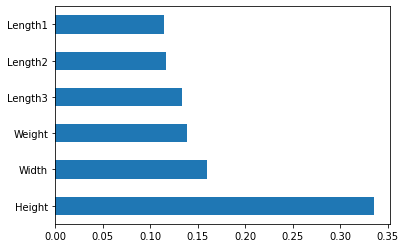

In [89]:
feat_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
#feat_importances.nsmallest(20).plot(kind='barh')


In [90]:
#Gaussian Naive Bayes

In [91]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [92]:
y_pred_nb = nb_model.predict(X_test)

In [93]:
accuracy_score(y_test, y_pred_nb)

0.5957446808510638

In [94]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.33      1.00      0.50         2
           2       0.33      0.13      0.19        15
           3       1.00      0.62      0.77         8
           4       0.18      0.67      0.29         3
           5       1.00      1.00      1.00         6
           6       0.00      0.00      0.00         1

    accuracy                           0.60        47
   macro avg       0.55      0.62      0.53        47
weighted avg       0.69      0.60      0.60        47



In [95]:
#KNN

In [96]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [97]:
y_pred_knn = knn_model.predict(X_test)

In [98]:
accuracy_score(y_test, y_pred_knn)

0.7872340425531915

In [99]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         2
           2       0.63      0.80      0.71        15
           3       1.00      0.62      0.77         8
           4       0.00      0.00      0.00         3
           5       1.00      1.00      1.00         6
           6       0.00      0.00      0.00         1

    accuracy                           0.79        47
   macro avg       0.66      0.63      0.64        47
weighted avg       0.80      0.79      0.78        47



In [100]:
#Random Forest

In [101]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [102]:
y_pred_rf = rf_model.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.8085106382978723

In [103]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         2
           2       0.73      0.73      0.73        15
           3       1.00      0.75      0.86         8
           4       0.17      0.33      0.22         3
           5       1.00      1.00      1.00         6
           6       0.00      0.00      0.00         1

    accuracy                           0.81        47
   macro avg       0.70      0.69      0.69        47
weighted avg       0.84      0.81      0.82        47



In [104]:
models = [
    knn_model,
    nb_model,
    rf_model,
    loj_model,
    model1,
    

      
]

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(names + ":" )
    print("Accuracy: {:.4%}".format(accuracy))

----------------------------
KNeighborsClassifier:
Accuracy: 78.7234%
----------------------------
GaussianNB:
Accuracy: 59.5745%
----------------------------
RandomForestClassifier:
Accuracy: 80.8511%
----------------------------
LogisticRegression:
Accuracy: 59.5745%
----------------------------
DecisionTreeClassifier:
Accuracy: 80.8511%
